# Problemas em Python: Transferência de Calor

Quando comecei a estudar programação, tive o privilégio de estar mergulhado no meio científico. Comecei solucionando os meus relatórios de física, passei por uma iniciação científica em física de partículas e terminei aficionado por cálculo numérico. Nesses meus quatro anos de graduação, eu percebi que a melhor forma de aprender programação é aplicando em problemas curiosos e é por esse motivo que decidi compartilhar alguns desses desafios nas próximas postagens.

### O Problema

Uma discussão bastante explorada em fenômenos térmicos é o da determinção da distribuição de temperaturas em superfícies. Quando um corpo em equilibrio térmico se encontra com outro de temperatura diferente, chamamos a forma de energia transferida entre eles de calor. Com o passar do tempo, essa troca de energia igualará a temperatura dos dois objetos, constituindo um novo estado de equilíbrio térmico. 

O mesmo deve acontecer em qualquer superfície. Ao colocar uma frigideira no fogão, por exemplo, o calor fornecido pela chama vai aumentar a temperatura de seu material até um patamar de equilíbrio. Nesse momento, a taxa de calor fornecida pela chama e a cedida para o ambiente se igualarão. Bom, você deve imaginar que colocar o dedão no meio da frigieira vai te machucar muito mais do que tocar nas bordas. É exatamente nesse fênomeno que estamos interessados: posições diferentes da chapa assumirão temperaturas de equilíbrio distintas. Nesse projeto, partiremos de uma placa retângular plana com temperaturas fixas em suas bordas e determinaremos, com a ajuda da física térmica, as temperaturas de equilíbrio em seu interior. 

### Solução Numérica da Equação de Laplace

Em um sistema bidimensional, podemos tratar a temperatura de uma placa como uma função de três variáveis $T(x, y, t)$. Neste caso, $x$ e $y$ são as posições na placa e $t$ o tempo. Uma função arbitrária poderia ser $T(x,y,z) = x + y + z$ e, dessa forma, poderíamos determinar a temperatura na coordenada $x = 1 m $ e $y=1 m$ no momento $t = 1s$: 

$$T(1,1,1) = 1 + 1 + 1 = 3ºC$$

O desafio, portanto, trata-se de encontrar essa função. Se soubermos qual a sua forma, podemos determinar as temperaturas no interior da placa em qualquer posição e momento! Da física térmica, entretanto, sabemos que ela deve satisfazer a equação de Laplace - uma equação diferencial em duas variáveis que não pretendo aprofundar por aqui. O que importa é que podemos aproximar as soluções dessa equação utilizando métodos numéricos. O resultado da aproximação seria:

$$T_{x,y}=\frac{1}{4}(T_{x,y-1}+T_{x,y+1}+T_{x-1,y}+T_{x+1,y})$$

O que isso quer dizer? Bom, a solução numérica parte da discretização da placa. Ao invés de considerarmos o espaço $(x,y)$ como contínuo, nós definiremos uma grade de valores que eles podem assumir. Por exemplo, podemos montar uma grade de 4 por 4, na qual x e y podem ser 1, 2, 3 e 4. A temperatura em qualquer ponto, portanto, será a média aritimética das temperaturas em sua vizinhança. 

Para se aprofundar um pouco mais nesse assunto, eu sugiro fortemente assistir o vídeo do 3Blue1Brown, que ele trata da solução analítica da equação de Laplace:

[![O que são equações diferenciais parciais?](http://img.youtube.com/vi/ly4S0oi3Yz8/0.jpg)](http://www.youtube.com/watch?v=ly4S0oi3Yz8)

### Solução para n=4


Agora que já vimos um pouco da teoria, vamos tentar aplicá-la em uma grade 4 por 4, onde $i$ representa a linha da grade e $j$ a coluna. Suponha que os limites da placa tenha as seguintes temperaturas:

$$T_{i,1} = 0$$
$$T_{1,j} = 0$$
$$T_{i,4} = 100K$$
$$T_{4,j} = 0$$

Podemos, portanto, escrever a temperatura nos 4 pontos restantes utilizando a aproximação da equação de Laplace:

$$T_{2,2}=\frac{1}{4}(T_{2,1}+T_{2,3}+T_{1,2}+T_{3,2})$$
$$T_{2,3}=\frac{1}{4}(T_{2,2}+T_{2,4}+T_{1,3}+T_{3,3})$$
$$T_{3,2}=\frac{1}{4}(T_{3,1}+T_{3,3}+T_{2,2}+T_{4,2})$$
$$T_{3,3}=\frac{1}{4}(T_{3,2}+T_{3,4}+T_{2,3}+T_{4,3})$$

Que, substituindo os valores conhecidos, é igual ao sistema abaixo:

$$\begin{cases}
-T_{2,3}-T_{3,2}+4T_{2,2}=0 \\
-T_{2,2}-T_{3,3}+4T_{2,3}=100 \\
-T_{3,3}-T_{2,2}+4T_{3,2}=0 \\
-T_{3,2}-T_{2,3}+4T_{3,3}=100
\end{cases}$$

Ufa! Temos um sistema de quatro equações com quatro variáveis. Isso significa que conseguimos resolver o problema analíticamente e que não é tão difícil assim de chegar no resultado final. Nas seções práticas, utilizaremos uma função do numpy que se encerragará de solucioná-lo.

### Descrevendo um Sistema Linear

Só resta um detalhe sobre esse sistema: é sempre mais fácil tratarmos dessas relações como matrizes. Utilizando um produto entre uma matriz e um vetor, podemos descrever a primeira parte da sequência de equações que determinamos. A matriz $A$ conterá os coeficientes $a_{x,y}$ que multiplicam as temperaturas $T_{x,y}$; o vetor $\vec{x}$, as temperaturas a serem definidas.

$$A=\left[\begin{array}{cccc} 
4 & -1 & -1 & 0 \\
-1 & 4 & 0 & -1 \\
-1 & 0 & 4 & -1 \\
0 & -1 & -1 & 4 \\
\end{array}\right] $$

$$\vec{x}=\left[\begin{array}{c} 
T_{2,2} \\
T_{2,3} \\
T_{3,2} \\
T_{3,3} \\
\end{array}\right]
$$

A segunda parte do sistema, será um outro vetor com as constantes do lado direito.

$$\vec{b}=\left[\begin{array}{c} 
0 \\
100 \\
0 \\
100 \\
\end{array}\right]
$$

O nosso conjunto de equações, portanto, é o produto abaixo, no qual queremos determinar o vetor $\vec{x}$ das temperaturas da placa.

$$\left[\begin{array}{cccc} 
4 & -1 & -1 & 0 \\
-1 & 4 & 0 & -1 \\
-1 & 0 & 4 & -1 \\
0 & -1 & -1 & 4 \\
\end{array}\right] 
\left[\begin{array}{c} 
T_{2,2} \\
T_{2,3} \\
T_{3,2} \\
T_{3,3} \\
\end{array}\right]=
\left[\begin{array}{c} 
0 \\
100 \\
0 \\
100 \\
\end{array}\right]$$

$$A\vec{x}=\vec{b}$$

# Mãos à Obra! 

Agora que já entendemos o panorâma teórico por trás do problema, chegou o momento de o aplicarmos em um algoritmo. Vamos começar construindo a nossa grade de temperaturas. Para isso, utilizaremos uma matriz de dimensão $n_{horizontal}=4$ por $n_{vertical}=4$.

In [2]:
"""
Imporando a biblioteca numpy para instanciar as matrizes.
"""
import numpy as np

"""
Definindo n_horizontal e n_vertical
"""
n_horizontal = 4
n_vertical = 4

"""
Cria uma matriz zerada com a dimensão determinada.
"""
grade = np.zeros([n_vertical, n_horizontal])

"""
Conferindo o resultado.
"""
print(grade)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Como sabemos as temperaturas dos limites da placa, vamos carregar esses valores na matriz. As temperaturas a definir, deixaremos com o valor $-1$ - o que não será um problema se utilizarmos apenas temperaturas absolutas em Kelvin. 

In [3]:
"""
Definindo as temperaturas dos limites da placa.
"""
temp_y_min = 0
temp_x_min = 0
temp_y_max = 0
temp_x_max = 100

"""
Povoa a matriz grade com as temperaturas definidas.

Obs: a matriz será construida com a seguinte ordem de prioridade para as temperaturas nos limites.

    temp_y_min > temp_x_min > temp_y_max > temp_x_max
"""
for i in range(len(grade)):

    for j in range(len(grade[i])):

        if j == (n_horizontal - 1):

            grade[i][j] = temp_x_max

        elif i == (n_vertical - 1):

            grade[i][j] = temp_y_max
            
        elif j == 0: 

            grade[i][j] = temp_x_min

        elif i == 0:

            grade[i][j] = temp_y_min

        else:

            grade[i][j] = -1
        
"""
Conferindo o Resultado
"""     
print(grade)

[[  0.   0.   0. 100.]
 [  0.  -1.  -1. 100.]
 [  0.  -1.  -1. 100.]
 [  0.   0.   0. 100.]]


Para calcularmos as temperaturas restantes, definiremos a matriz $A$ e o vetor $\vec{b}$ com os dados do problema.

In [4]:
"""
Inicializa as matrizes A e b
"""
A = np.zeros([(n_vertical-2)*(n_horizontal-2), (n_vertical-2)*(n_horizontal-2)])
b = np.zeros([(n_vertical-2)*(n_horizontal-2),1])

"""
Inicializa uma variável k para representar as linhas de A e b.
"""
k = 0

for i in range(len(grade)):
    
    for j in range(len(grade[i])):
        """
        Itera na grade de temperaturas.
        """

        if (i > 0 and i < (n_vertical - 1)) and (j > 0 and j < (n_horizontal - 1)):
            """
            Garante que estamos lidando apenas com as temperaturas não dadas, fora dos limites da placa.
            """

            """
            Transforma i,j da grade em I,J da matriz A.
            """
            I_1 = i - 1
            J_1 = j - 1

            """
            Calcula a coluna de T_{i,j} em A.
            """
            coluna_1 = I_1*(n_horizontal - 2) + J_1

            A[k][coluna_1] = 4
            b[k][0] = 0 

            if grade[i+1][j] == -1:

                I_2 = (i+1) - 1
                J_2 = j - 1

                """
                Calcula a coluna de T_{i+1,j} em A.
                """
                coluna_2 = I_2*(n_horizontal - 2) + J_2

                A[k][coluna_2] = -1

            else:

                b[k][0] += grade[i+1][j]

            if grade[i-1][j] == -1:

                I_3 = (i-1) - 1
                J_3 = j - 1

                """
                Calcula a coluna de T_{i-1,j} em A.
                """
                coluna_3 = I_3*(n_horizontal - 2) + J_3

                A[k][coluna_3] = -1

            else:

                b[k][0] += grade[i-1][j]

            if grade[i][j+1] == -1:
                
                I_4 = i - 1
                J_4 = (j+1) - 1

                """
                Calcula a coluna de T_{i,j+1} em A.
                """
                coluna_4 = I_4*(n_horizontal - 2) + J_4

                A[k][coluna_4] = -1

            else:

                b[k][0] += grade[i][j+1]

            if grade[i][j-1] == -1:

                I_5 = i - 1
                J_5 = (j-1) - 1

                """
                Calcula a coluna de T_{i,j-1} em A.
                """
                coluna_5 = I_5*(n_horizontal - 2) + J_5

                A[k][coluna_5] = -1
            
            else:

                b[k][0] += grade[i][j-1]

            k += 1
            
"""
Conferindo o Resultado
"""     
print(A)
print(b)

[[ 4. -1. -1.  0.]
 [-1.  4.  0. -1.]
 [-1.  0.  4. -1.]
 [ 0. -1. -1.  4.]]
[[  0.]
 [100.]
 [  0.]
 [100.]]


Agora, resolveremos o sistema $A\vec{x}=\vec{b}$ e povoaremos a grade de temperaturas com o resultado.

In [5]:
"""
Resolve o sistema obtido para a placa.
"""
x = np.linalg.solve(A, b)

"""
Povoa a grade de temperaturas com os resultados obtidos em x.
"""
for i in range(len(grade)):

    for j in range(len(grade[i])):

        if (i > 0 and i < (n_vertical - 1)) and (j > 0 and j < (n_horizontal - 1)):

            I = i - 1
            J = j - 1

            grade[i][j] = x[I*(n_horizontal - 2) + J]

"""
Conferindo o Resultado
"""
print(grade)

[[  0.    0.    0.  100. ]
 [  0.   12.5  37.5 100. ]
 [  0.   12.5  37.5 100. ]
 [  0.    0.    0.  100. ]]


Finalmente, podemos plotar a solução obtida em um mapa de calor.

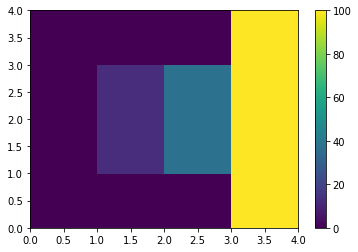

In [6]:
"""
Imporando a biblioteca matplotlib para plotar o resultado.
"""
import matplotlib.pyplot as plt


"""
Plota um histograma da distribuição de temperatura na placa.
"""

fig = plt.figure('Distribuição de Temperatura - Histograma')
pcm = plt.pcolormesh(grade)
plt.colorbar()
plt.show()

### Generalizando

Agora que entendemos como o algoritmo funciona, vamos estrapolar a nossa grade para o caso $n_{horizontal}=100$ por $n_{vertical}=100$. Utilizaremos as novas temperaturas:

$$T_{i,1} = 0$$
$$T_{1,j} = 25K$$
$$T_{i,4} = 100K$$
$$T_{4,j} = 125K$$

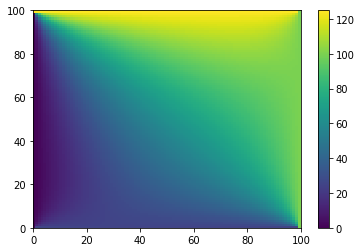

<Figure size 432x288 with 0 Axes>

In [8]:
"""
Imporando as bibliotecas necessárias
"""
import numpy as np
import matplotlib.pyplot as plt

"""
Definindo n_horizontal e n_vertical
"""
n_horizontal = 100
n_vertical = 100

"""
Cria uma matriz zerada com a dimensão determinada.
"""
grade = np.zeros([n_vertical, n_horizontal])

"""
Definindo as temperaturas dos limites da placa.
"""
temp_y_min = 25
temp_x_min = 0
temp_y_max = 125
temp_x_max = 100

"""
Povoa a matriz grade com as temperaturas definidas.

Obs: a matriz será construida com a seguinte ordem de prioridade para as temperaturas nos limites.

    temp_y_min > temp_x_min > temp_y_max > temp_x_max
"""
for i in range(len(grade)):

    for j in range(len(grade[i])):

        if j == (n_horizontal - 1):

            grade[i][j] = temp_x_max

        elif i == (n_vertical - 1):

            grade[i][j] = temp_y_max
            
        elif j == 0: 

            grade[i][j] = temp_x_min

        elif i == 0:

            grade[i][j] = temp_y_min

        else:

            grade[i][j] = -1

"""
Inicializa as matrizes A e b
"""
A = np.zeros([(n_vertical-2)*(n_horizontal-2), (n_vertical-2)*(n_horizontal-2)])
b = np.zeros([(n_vertical-2)*(n_horizontal-2),1])

"""
Inicializa uma variável k para representar as linhas de A e b.
"""
k = 0

for i in range(len(grade)):
    
    for j in range(len(grade[i])):
        """
        Itera na grade de temperaturas.
        """

        if (i > 0 and i < (n_vertical - 1)) and (j > 0 and j < (n_horizontal - 1)):
            """
            Garante que estamos lidando apenas com as temperaturas não dadas, fora dos limites da placa.
            """

            """
            Transforma i,j da grade em I,J da matriz A.
            """
            I_1 = i - 1
            J_1 = j - 1

            """
            Calcula a coluna de T_{i,j} em A.
            """
            coluna_1 = I_1*(n_horizontal - 2) + J_1

            A[k][coluna_1] = 4
            b[k][0] = 0 

            if grade[i+1][j] == -1:

                I_2 = (i+1) - 1
                J_2 = j - 1

                """
                Calcula a coluna de T_{i+1,j} em A.
                """
                coluna_2 = I_2*(n_horizontal - 2) + J_2

                A[k][coluna_2] = -1

            else:

                b[k][0] += grade[i+1][j]

            if grade[i-1][j] == -1:

                I_3 = (i-1) - 1
                J_3 = j - 1

                """
                Calcula a coluna de T_{i-1,j} em A.
                """
                coluna_3 = I_3*(n_horizontal - 2) + J_3

                A[k][coluna_3] = -1

            else:

                b[k][0] += grade[i-1][j]

            if grade[i][j+1] == -1:
                
                I_4 = i - 1
                J_4 = (j+1) - 1

                """
                Calcula a coluna de T_{i,j+1} em A.
                """
                coluna_4 = I_4*(n_horizontal - 2) + J_4

                A[k][coluna_4] = -1

            else:

                b[k][0] += grade[i][j+1]

            if grade[i][j-1] == -1:

                I_5 = i - 1
                J_5 = (j-1) - 1

                """
                Calcula a coluna de T_{i,j-1} em A.
                """
                coluna_5 = I_5*(n_horizontal - 2) + J_5

                A[k][coluna_5] = -1
            
            else:

                b[k][0] += grade[i][j-1]

            k += 1

"""
Resolve o sistema obtido para a placa.
"""
x = np.linalg.solve(A, b)

"""
Povoa a grade de temperaturas com os resultados obtidos em x.
"""
for i in range(len(grade)):

    for j in range(len(grade[i])):

        if (i > 0 and i < (n_vertical - 1)) and (j > 0 and j < (n_horizontal - 1)):

            I = i - 1
            J = j - 1

            grade[i][j] = x[I*(n_horizontal - 2) + J]

"""
Plota um histograma da distribuição de temperatura na placa.
"""

fig = plt.figure('Distribuição de Temperatura - Histograma')
pcm = plt.pcolormesh(grade)
plt.colorbar()
plt.show()

Ufa! Conseguimos um resultado bastante interessante passando por diversos temas cruciais do meio científico. Agora, eu te encorajo a tentar o seguinte desafio: altere o código que eu disponibilizei para permitir a adição de zonas de temperaturas fixas no interior da placa! Confesso que quando tentei foi um desafio e tanto, aposto que você também irá se divertir.